Exploratory Data Analysis (EDA) 
- is used to analyze the datasets using pandas, numpy, matplotlib, etc., and dealing with missing values. By doing EDA, we summarize their main importance.

Feature Engineering 
 - is the process of extracting features from raw data with some domain knowledge.

Feature Selection 
- is where we select those features from the dataframe that will give a high impact on the estimator.

Model creation 
 - in this, we create a machine learning model using suitable algorithms, e.g., regressor or classifier.

Deployment 
 - where we deploy our ML model on the web.

- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

Accuracy
- (true positive + true negative) / total
- the number of accurate predicition over the total size

Precision 
- true positive / (true positive + false positive)
- over the total predicted positive 
- Precision is a good measure to determine, when the costs of False Positive is high
- higher better 

Recall 
- true positive / (true positive + false negative )
- over the total actual positive 
- Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

F1 score
- F1 which is a function of Precision and Recall
- to seek a balance between Precision and Recall.


In [2]:
import pandas as pd
import numpy as np
import pickle 

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import string 

In [41]:
sb.set()
pd.set_option('display.max_colwidth', None)

## Handling imbalance dataset

- https://www.youtube.com/watch?v=JnlM4yLFNuo


# SE2019 dataset

In [80]:
df = pd.read_csv("Dataset/SE2019/processed_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8993 entries, 0 to 8992
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   8993 non-null   object
 1   text    8993 non-null   object
 2   hate    8993 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 210.9+ KB


In [28]:
df.head(5)

,class,text,hate
0,Hate,hurray save us mani way potus realdonaldtrump...,1
1,Hate,would young fight age men vast major one escap...,1
2,Hate,kamalaharri illeg dump kid border like road ki...,1
3,Non-Hate,ny time near white state pose array problem im...,0
4,Non-Hate,orban brussel european leader ignor peopl want...,0


In [29]:
df['class'].value_counts()

class
Non-Hate    5208
Hate        3782
Name: count, dtype: int64

In [30]:
df[df['text'].isnull()]

,class,text,hate


## Feature engineering

- https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/
- CountVectorizer, Tfidftransformer & Tfidfvectorizer are Frequency based Word Embedding technique
- Tfidftransformer acts on sparse matrix and Tfidfvectorizer acts on raw text data
- Tfidfvectorizer = countVectorizater + Tfidftransformer

- https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [176]:
x = df["text"]
y = df["class"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=42) #random state ensure same sample
print("Train Set :", x_train.shape, y_train.shape) 
print("Test Set  :", x_test.shape, y_test.shape) 


Train Set : (6295,) (6295,)
Test Set  : (2698,) (2698,)


6462

In [177]:
x_train.head()

6462              hoe dont even know  tragiqu    add back
3956    everyth time magazin  cri girl  immigr propaga...
8016                          first time sleep   guy day 
3589    report  white hous consid refuge cap        fi...
1514    video   part    london #bnp frame trailer soun...
Name: text, dtype: object

In [84]:
# save model
def save_model(model, model_name):
    filename = f"models/{model_name}.pickle"
    pickle.dump(model, open(filename,"wb"))

- https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568

- bag og words = countvectorizer

# Word2Vec

In [114]:
from gensim.models import Word2Vec

In [178]:
class w2vVectorizer():
    def __init__(self) -> None:
        self.w2v_model = None
    
    def w2v_vectorizer(self,sentence):
        words = sentence.split()
        words_vec = [self.w2v_model.wv[word] for word in words if word in self.w2v_model.wv]
        if len(words_vec) == 0:
            return np.zeros(100)
        words_vec = np.array(words_vec)
        return words_vec.mean(axis=0)
    
    def fit(self, x, y=None):
        sentences = [sentence.split() for sentence in x]
        self.w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)
        return self
    
    def transform(self, x, y=None):
        return np.array([self.w2v_vectorizer(sentence) for sentence in x])

# DecisionTreeClassifier

In [24]:
#convert given text to a vector base
from sklearn.tree import DecisionTreeClassifier

In [179]:
model = Pipeline([('vect', CountVectorizer()),
               ('clf', DecisionTreeClassifier()),
              ])
model_name = "dtc"
model.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', DecisionTreeClassifier())])

In [180]:
save_model(model, model_name)

In [181]:
model = Pipeline([('vect', TfidfVectorizer()),
               ('clf', DecisionTreeClassifier()),
              ])
model_name = "dtc-tfid"
model.fit(x_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', DecisionTreeClassifier())])

In [182]:
save_model(model, model_name)

In [183]:
model = Pipeline([('vect', w2vVectorizer()),
               ('clf', DecisionTreeClassifier()),
              ])
model_name = "dtc-w2v"
model.fit(x_train, y_train)

Pipeline(steps=[('vect', <__main__.w2vVectorizer object at 0x000002BAD0E1BBD0>),
                ('clf', DecisionTreeClassifier())])

In [184]:
save_model(model, model_name)

# SVM

- supervisied learning algorithm
- Unlike neural networks, SVMs can work with very small datasets and are not prone to overfitting.

In [99]:
from sklearn.linear_model import SGDClassifier

In [185]:
model = Pipeline([('vect', CountVectorizer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
model_name = "svm"
model.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [186]:
save_model(model, model_name)

In [187]:
model = Pipeline([('vect', TfidfVectorizer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
              ])
model_name = "svm-tfid"
model.fit(x_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [188]:
save_model(model, model_name)

In [189]:
model = Pipeline([('vect', w2vVectorizer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
              ])
model_name = "svm-w2v"
model.fit(x_train, y_train)

Pipeline(steps=[('vect', <__main__.w2vVectorizer object at 0x000002BAD1078850>),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [190]:
save_model(model, model_name)

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [191]:
model = Pipeline([('vect', CountVectorizer()),
        ('clf', LogisticRegression(n_jobs=1, C=1e5,max_iter=6300)),
        ])
model_name = "lr"
model.fit(x_train, y_train)

In [ ]:
save_model(model, model_name)

In [192]:
model = Pipeline([('vect', TfidfVectorizer()),
        ('clf', LogisticRegression(n_jobs=1, C=1e5,max_iter=6300)),
        ])
model_name = "lr-tfid"
model.fit(x_train, y_train)

In [ ]:
save_model(model, model_name)

In [194]:
model = Pipeline([('vect', w2vVectorizer()),
        ('clf', LogisticRegression(n_jobs=1, C=1e5,max_iter=6300)),
        ])
model_name = "lr-w2v"
model.fit(x_train, y_train)

Pipeline(steps=[('vect', <__main__.w2vVectorizer object at 0x000002BAD1965550>),
                ('clf',
                 LogisticRegression(C=100000.0, max_iter=6300, n_jobs=1))])

In [195]:
save_model(model, model_name)

# Results

In [141]:
# Predict data
print("Test Data Accuracy  :\t", model.score(x_test, y_test))
y_test_pred = model.predict(x_test)

Test Data Accuracy  :	 0.617123795404003


In [91]:
print(model.predict_proba(x_test))

[[0.13333333 0.86666667]
 [0.         1.        ]
 [1.         0.        ]
 ...
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]]


In [89]:
y_test_pred

array(['Non-Hate', 'Non-Hate', 'Hate', ..., 'Hate', 'Hate', 'Non-Hate'],
      dtype=object)

In [87]:
# Classification report
print(classification_report(y_test, y_test_pred, labels=["Hate","Non-Hate"]))

              precision    recall  f1-score   support

        Hate       0.70      0.68      0.69      1115
    Non-Hate       0.78      0.79      0.78      1583

    accuracy                           0.75      2698
   macro avg       0.74      0.74      0.74      2698
weighted avg       0.75      0.75      0.75      2698



Count: Actual
Non-Hate    1583
Hate        1115
Name: count, dtype: int64

Count: Predict
Non-Hate    1527
Hate        1171
Name: count, dtype: int64



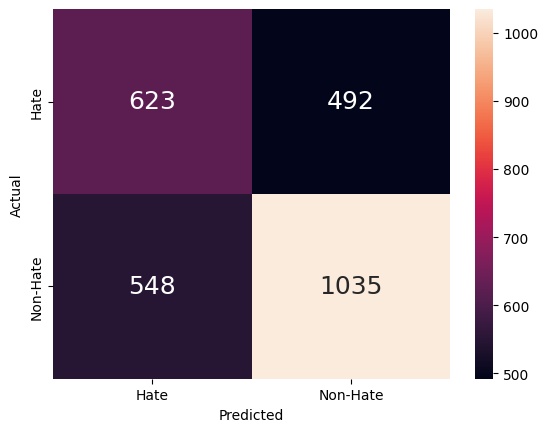

In [125]:
# Heatmap
ax = plt.subplot()

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=["Hate","Non-Hate"]), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(["Hate","Non-Hate"])
ax.yaxis.set_ticklabels(["Hate","Non-Hate"])

# Count
df1 = pd.DataFrame({'Actual':y_test, 'Predict':y_test_pred})
# print(df1.describe())
print(f"Count: {df1['Actual'].value_counts()}")
print()
print(f"Count: {df1['Predict'].value_counts()}")
print()

# Model Compare

In [46]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

def print_score(y_test, y_test_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
    score = precision_recall_fscore_support(y_test, y_test_pred, average="weighted")
    print(f"Precision: {score[0]:.2f}")
    print(f"Recall: {score[1]:.2f}")
    print(f"F1-score: {score[2]:.2f}")
    print()
    # print(precision_recall_fscore_support(y_test, y_test_pred, average="micro"))

In [196]:
# load model
model_to_load = ["dtc", "dtc-tfid", "dtc-w2v","svm", "svm-tfid", "svm-w2v", "lr", "lr-tfid","svm-w2v"]

for i in model_to_load:
    print(i)
    filename = f"models/{i}.pickle"
    old_model = pickle.load(open(filename,"rb"))
    y_test_pred = old_model.predict(x_test)
    print_score(y_test, y_test_pred)


dtc
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-score: 0.74

dtc-tfid
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1-score: 0.73

dtc-w2v
Accuracy: 0.60
Precision: 0.61
Recall: 0.60
F1-score: 0.61

svm
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1-score: 0.76

svm-tfid
Accuracy: 0.75
Precision: 0.76
Recall: 0.75
F1-score: 0.73

svm-w2v
Accuracy: 0.61
Precision: 0.61
Recall: 0.61
F1-score: 0.61

lr
Accuracy: 0.66
Precision: 0.67
Recall: 0.66
F1-score: 0.66

lr-tfid
Accuracy: 0.67
Precision: 0.68
Recall: 0.67
F1-score: 0.67

svm-w2v
Accuracy: 0.61
Precision: 0.61
Recall: 0.61
F1-score: 0.61



## BERT

- https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270
- https://www.youtube.com/watch?v=hOCDJyZ6quA
- tensorflow hub bert https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4

- bert will convert sentence into embeding vector which will feed to neural network for training 
- consist of preprocess and embeding 

In [ ]:
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

## GPT

## WORD2VEC
- https://www.youtube.com/watch?v=hQwFeIupNP0
- Word2vec is not a single algorithm but a combination of two techniques – CBOW(Continuous bag of words) and Skip-gram model.